# Pandas (Cleaning Data & Plotting)

## Craeting a table from data

In [132]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
MyDataSet = pd.DataFrame({"Cars": ["BMW", "volvo", "ford"], "numbers": [1,3,7]})
print(MyDataSet)
print(type(MyDataSet))

    Cars  numbers
0    BMW        1
1  volvo        3
2   ford        7
<class 'pandas.core.frame.DataFrame'>


In [9]:
# accessing specific rows 

print(MyDataSet.loc[0])
print(MyDataSet.iloc[0,1])

Cars       BMW
numbers      1
Name: 0, dtype: object
1


## Creating series 

In [11]:
a = [1,2,3]
d = pd.Series(a)
print(d)

0    1
1    2
2    3
dtype: int64


In [13]:
# craeting labels to access data 

z = pd.Series(a, index = ["X","Y","Z"])
print(z)

X    1
Y    2
Z    3
dtype: int64


## Load data 

In [105]:
df = pd.read_csv("data cleaning.csv")
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,450,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


#### display data 

In [107]:
# to display first 5 rows 
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [109]:
# to display last 5 rows 
df.tail()

,Duration,Pulse,Maxpulse,Calories
27,60,92,118,241.0
28,60,103,132,NaN
29,60,100,132,280.0
30,60,102,129,380.3
31,60,92,115,243.0


#### Data information

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Pulse     32 non-null     int64  
 2   Maxpulse  32 non-null     int64  
 3   Calories  30 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


In [114]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


## Cleaning data 

### Dealing with missing values 

##### Deleting missing value 

In [ ]:
new_df = df.dropna()

##### Filling missing values by 4 ways 

In [116]:
# by specific number 

df["Calories"].fillna(130)

0     409.1
1     479.0
2     340.0
3     282.4
4     406.0
5     300.0
6     374.0
7     253.3
8     195.1
9     269.0
10    329.3
11    250.7
12    250.7
13    345.3
14    379.3
15    275.0
16    215.2
17    300.0
18    130.0
19    323.0
20    243.0
21    364.2
22    282.0
23    300.0
24    246.0
25    334.5
26    250.0
27    241.0
28    130.0
29    280.0
30    380.3
31    243.0
Name: Calories, dtype: float64

In [118]:
# by mean

new_mean = df["Calories"].mean()
df["Calories"].fillna(new_mean)

0     409.10
1     479.00
2     340.00
3     282.40
4     406.00
5     300.00
6     374.00
7     253.30
8     195.10
9     269.00
10    329.30
11    250.70
12    250.70
13    345.30
14    379.30
15    275.00
16    215.20
17    300.00
18    304.68
19    323.00
20    243.00
21    364.20
22    282.00
23    300.00
24    246.00
25    334.50
26    250.00
27    241.00
28    304.68
29    280.00
30    380.30
31    243.00
Name: Calories, dtype: float64

In [ ]:
#by mode (first repeated value)

modee = df["Calories"].mode()[0]
df["Calories"].fillna(modee) 

In [ ]:
# by random way from pandas function 

imputed_columns = df.iloc[: , [1,2]]
from sklearn.impute import SimpleImputer
si = SimpleImputer ()
imputed = pd.DataFrame(si.fit_transform(imputed_columns))  
imputed

### Dealing with wrong format

### Dealing with incorrect info 

In [122]:
# correct wrong values

for x in df.index:
    if df.loc[x, "Duration"] > 120:
        df.loc[x, "Duration"] = 120
print(df)

    Duration  Pulse  Maxpulse  Calories
0         60    110       130     409.1
1         60    117       145     479.0
2         60    103       135     340.0
3         45    109       175     282.4
4         45    117       148     406.0
5         60    102       127     300.0
6         60    110       136     374.0
7        120    104       134     253.3
8         30    109       133     195.1
9         60     98       124     269.0
10        60    103       147     329.3
11        60    100       120     250.7
12        60    100       120     250.7
13        60    106       128     345.3
14        60    104       132     379.3
15        60     98       123     275.0
16        60     98       120     215.2
17        60    100       120     300.0
18        45     90       112       NaN
19        60    103       123     323.0
20        45     97       125     243.0
21        60    108       131     364.2
22        45    100       119     282.0
23        60    130       101     300.0


In [124]:
# drop wrong value 

for x in df.index:
    if df.loc[x, "Duration"] > 120:
       df.drop(x)

### Removing duplicates 

In [126]:
# to display duplicates 

print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool


In [53]:
# to remove duplicates 

df.drop_duplicates()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.10
1,60,'2020/12/02',117,145,479.00
2,60,'2020/12/03',103,135,340.00
3,45,'2020/12/04',109,175,282.40
4,45,'2020/12/05',117,148,406.00
5,60,'2020/12/06',102,127,300.00
6,60,'2020/12/07',110,136,374.00
7,120,'2020/12/08',104,134,253.30
8,30,'2020/12/09',109,133,195.10
9,60,'2020/12/10',98,124,269.00


### Correlation

In [128]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.027244,-0.073877,0.043951
Pulse,-0.027244,1.000000,0.276583,0.513186
Maxpulse,-0.073877,0.276583,1.000000,0.357460
Calories,0.043951,0.513186,0.357460,1.000000


<Axes: >

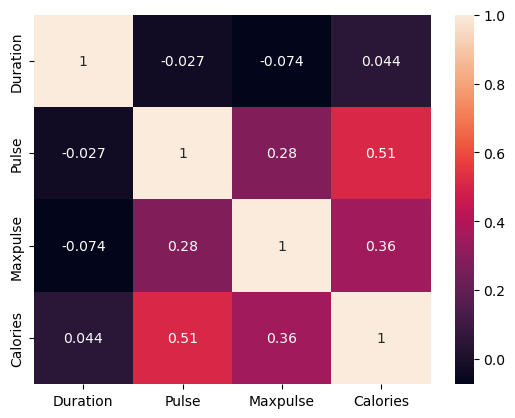

In [150]:
# to display corr 
import seaborn as sns 
sns.heatmap(df.corr(), annot=True)

## Plotting 

<Axes: >

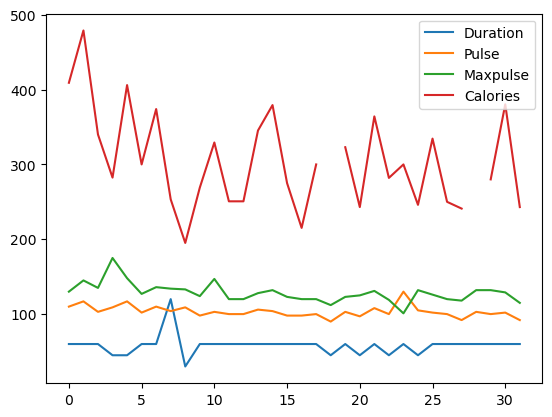

In [138]:
df.plot()

<Axes: xlabel='Duration', ylabel='Calories'>

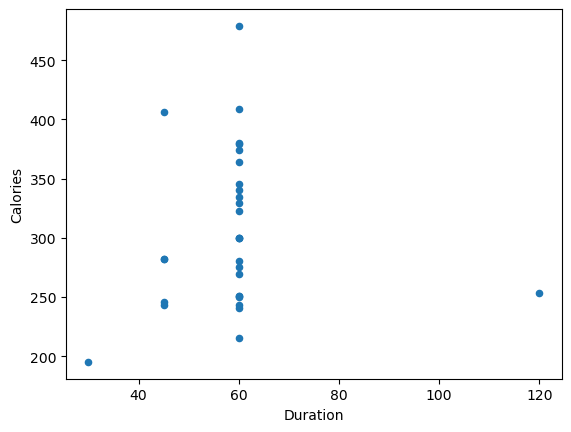

In [140]:
df.plot(kind = "scatter", x= "Duration", y= "Calories")

<Axes: ylabel='Frequency'>

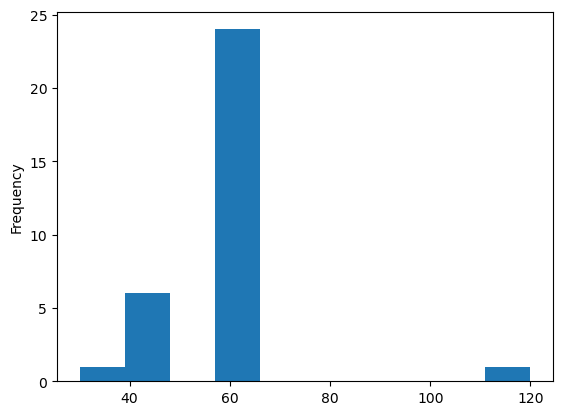

In [146]:
df["Duration"].plot(kind = "hist")